# Multilayer Perceptron Exercise Sheet



In [ ]:
'''
This class creates a random MLP based on several

'''
import torch
import numpy as np

class RandomMLP():

     def __init__(self, n_hidden_nodes, input_dis : tuple [int, int], bias_dis : tuple[int, int], output_dis : tuple[int, int] ):
          self.n_hidden_nodes = n_hidden_nodes
          self.input_dis = input_dis
          self.bias_dis = bias_dis
          self.output_dis = output_dis
          self.input_matrix = self.init_input_matrix()
          self.output_matrix = self.init_output_matrix()
          self.input_bias = self.init_input_bias()


     def activation(self, input : np.ndarray) -> np.ndarray:
          return np.tanh(input)

     def init_input_matrix(self) -> np.ndarray:
          return np.random.normal(self.input_dis[0], self.input_dis[1], size=(self.n_hidden_nodes, 1))

     def init_output_matrix(self)-> np.ndarray:
          return np.random.normal(self.output_dis[0], self.output_dis[1], size=(self.n_hidden_nodes, 1))

     def init_input_bias(self) -> np.ndarray:
          return np.random.uniform(self.bias_dis[0], self.bias_dis[1], size=(self.n_hidden_nodes, 1))

     def forward_pass(self, input : float) -> float:
          #print(self.input_matrix.shape)
          #print(self.input_matrix.T.shape)
          hidden_output = self.activation(np.dot(np.array([input]), self.input_matrix.T) - self.input_bias.T)

          return float(np.dot(hidden_output , self.output_matrix))
     
     def __str__(self):
        return (
            f"RandomMLP("
            f"hidden_layers={self.hidden_layers}, "
            f"dis_input_weight={self.dis_input_weight}, "
            f"dis_bias={self.dis_bias}, "
            f"parameters={self.parameters}"
            f")"
        )



In [24]:
'''
Here we define the mean squared error for all the different MLPs
'''

def negative_identity(input : float) -> float:
     return -input


def mean_squared_error(predictions : list[float], inputs : list[float]) -> list[float]:
     errors = []
     for x in range(len(predictions)):
          errors.append(pow(predictions[x] - negative_identity(inputs[x]), 2) )
     
     return sum(errors) / len(errors)



In [32]:

SIZE = 50


# get different sets of models
first_set = [RandomMLP(100, (0,2), (-2,2), (0, 1)) for _ in range(SIZE)]
second_set = [RandomMLP(10, (0, 2), (-2,2), (0, 1)) for _ in range(SIZE)]
third_set = [RandomMLP(10, (0, 1), (-2,2), (0, 1)) for _ in range(SIZE)]

# get the inputs uniformly from [-2, 2]
inputs = np.linspace(-2, 2, SIZE).tolist()
print(inputs)

pred_1 = []
pred_2 = []
pred_3 = []
for x in range(SIZE):
     appre_1 = []
     appre_2 = []
     appre_3 = []
     for input in inputs:
          appre_1.append(first_set[x].forward_pass(input))
          appre_2.append(second_set[x].forward_pass(input))
          appre_3.append(third_set[x].forward_pass(input))

     pred_1.append(appre_1)
     pred_2.append(appre_2)
     pred_3.append(appre_3)


MSE_1 = [mean_squared_error(predictions=pred_1[x], inputs=inputs) for x in range(SIZE)]
MSE_2 = [mean_squared_error(predictions=pred_2[x], inputs=inputs) for x in range(SIZE)]
MSE_3 = [mean_squared_error(predictions=pred_3[x], inputs=inputs) for x in range(SIZE)]
best_index_1 = MSE_1.index(min(MSE_1))
best_index_2 = MSE_2.index(min(MSE_2))
best_index_3 = MSE_3.index(min(MSE_3))
print(MSE_1.index(min(MSE_1)))
print(MSE_2.index(min(MSE_2)))



[-2.0, -1.9183673469387754, -1.836734693877551, -1.7551020408163265, -1.6734693877551021, -1.5918367346938775, -1.510204081632653, -1.4285714285714286, -1.3469387755102042, -1.2653061224489797, -1.183673469387755, -1.1020408163265307, -1.0204081632653061, -0.9387755102040818, -0.8571428571428572, -0.7755102040816328, -0.6938775510204083, -0.6122448979591837, -0.5306122448979593, -0.44897959183673475, -0.3673469387755104, -0.2857142857142858, -0.20408163265306145, -0.12244897959183687, -0.04081632653061229, 0.04081632653061229, 0.12244897959183643, 0.204081632653061, 0.2857142857142856, 0.36734693877551017, 0.4489795918367343, 0.5306122448979589, 0.6122448979591835, 0.693877551020408, 0.7755102040816326, 0.8571428571428568, 0.9387755102040813, 1.020408163265306, 1.1020408163265305, 1.1836734693877546, 1.2653061224489792, 1.3469387755102038, 1.4285714285714284, 1.510204081632653, 1.591836734693877, 1.6734693877551017, 1.7551020408163263, 1.8367346938775508, 1.9183673469387754, 2.0]
21
45

C:\Users\jojog\AppData\Local\Temp\ipykernel_14880\563001303.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.dot(hidden_output , self.output_matrix))


[2.0431531265123275, 2.0159161469658113, 1.9904671238323672, 1.9655833331847625, 1.9398159371343797, 1.9114430327731848, 1.8784123353029407, 1.8382946013522892, 1.7882853394738034, 1.7253092227958824, 1.646289500046037, 1.5486207130850629, 1.430785350543053, 1.292839221408762, 1.1361830503327792, 0.9618682776856414, 0.7671098569065793, 0.5409822339396962, 0.26189538720509087, -0.09965545713426623, -0.569018430169205, -1.1422606608534394, -1.7604657392025511, -2.3331951032849014, -2.809869768926961, -3.1559620487274205, -3.2361382260775318, -2.8467090426465758, -1.9798621596983692, -0.9341459489194558, 0.00318906719727563, 0.7119153155333775, 1.1651608179240553, 1.391463281382324, 1.4381879099678798, 1.3445319468355144, 1.139790400383677, 0.8497368808445511, 0.49946741251805427, 0.11251563347102089, -0.2908866991900678, -0.6947971023412705, -1.087630522292934, -1.4616815165627621, -1.8124503111029502, -2.137958712453659, -2.438122086798499, -2.7141925328831182, -2.9682776123718457, -3.2

C:\Users\jojog\AppData\Local\Temp\ipykernel_14880\563001303.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.dot(hidden_output , self.output_matrix))


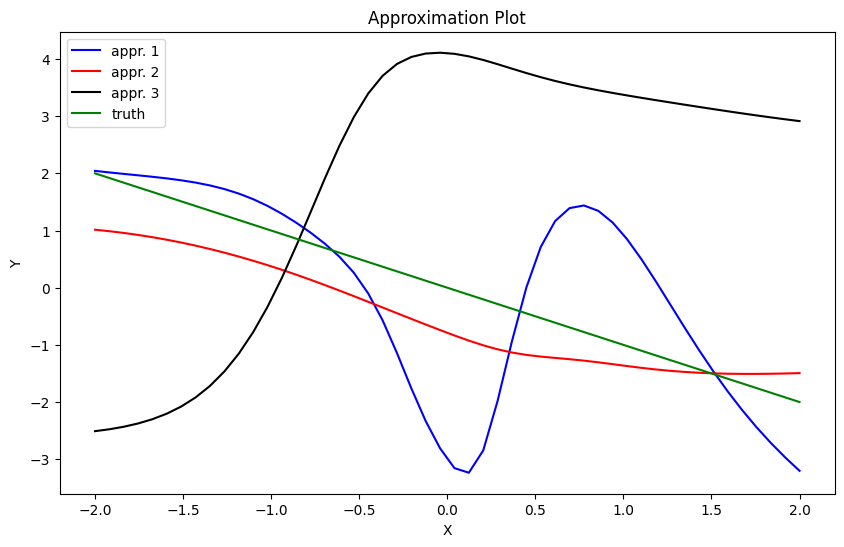

In [33]:
apprx_1 = [first_set[best_index_1].forward_pass(inputs[x]) for x in range(SIZE)]
print(apprx_1)
apprx_2 = [second_set[best_index_2].forward_pass(inputs[x]) for x in range(SIZE)]
apprx_3 = [second_set[best_index_3].forward_pass(inputs[x]) for x in range(SIZE)]
print(apprx_2)
ground_truth = [negative_identity(inputs[x]) for x in range(SIZE)]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot each time series
plt.plot(inputs, apprx_1, label="appr. 1", color="blue")
plt.plot(inputs, apprx_2, label="appr. 2", color="red")
plt.plot(inputs, apprx_3, label="appr. 3", color="black")
plt.plot(inputs, ground_truth, label="truth", color="green")

# Add labels, title, and legend
plt.title("Approximation Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()  # Display legend


# MLP Regression Task

In [1]:
# regression data in Form [x | Y]
regression_data = [
    [0.5503, -0.5894],
    [0.9206, -0.2507],
    [0.5359, -0.0468],
    [0.6081, -0.3402],
    [0.0202, 0.2857],
    [0.8545, -1.0683],
    [0.2357, 0.8605],
    [0.4847, -0.0801],
    [0.3996, 0.6837],
    [0.1957, 1.1850],
]

# Creating a MLP from Scratch

- 1 input node
- 1 hidden layer 3 hidden nodes, activation tanh
- 1 output node, activation identity


In mathematical terms we can write this as:

we have weights from input to the hidden layer: w_10 = [w1, w2, w3] (transposed)

we have weights from hidden layer to the output node : w_21 = [w3, w4, w5] (transposed)

we can write this entire MLP as follows:

$ f(x) = id(tanh(x * w_{10} - b_1) * w_{21} - b_2)$ , where id denotes the identity function and b_i the bias for the layer i

# Backpropagation












In [ ]:
import numpy as np

# the quadratic cost function for exactly observation
def quadratic_error( output : float, truth : float) -> float:
     return pow(output - truth, 2)

def linear_error( output : float, truth : float) -> float:
     return abs(output - truth)

class RegressionMLP:

     def __init__(self, learning_rate : float , error_function : callable , stopping_threshold : float, max_runs : int):
          self.w10 = self.initialize_parameters_randomly(3)
          self.b1 = self.initialize_parameters_randomly(3)
          self.w21 = self.initialize_parameters_randomly(3)
          self.b2 = self.initialize_parameters_randomly(1)
          self.hidden_activation = np.tanh()
          # no need for output activation since it is the identity function
          self.learning_rate = learning_rate
          self.error_function = error_function
          self.stopping_treshold = stopping_threshold
          self.max_runs = max_runs
     
     # initializes the biases and parameters randomly from uniform distribution [-0.5, 0.5]
     def initialize_parameters_randomly(self, lenght_vector : int)-> list[float]:
          return np.random.uniform(-0.5, 0.5, lenght_vector).tolist()
        
     
     # calculates the forward pass with matrix multiplication
     def forward_pass(self, input : float)-> float:
          # calculates the the hidden layer
          out = self.hidden_activation(np.array(self.w10) * input - np.array(self.b1))
          print(f"output vector after hidden layer: {out}")
          out = float(np.dot(out , np.array(self.w21))) - self.b2[0]
          print(f"this is the output: {out}")
          return out
     
     #implementing the quadratic cost function
     def calc_error(self, output : float, truth : float) -> float:
          return self.error_function(output, truth)
     
     def backward_pass (self):
          
     
     def gradient_descent(self):
          counter = 0
          while counter < self.max_runs and :
               gradient = 
     










          